<a href="https://colab.research.google.com/github/BachokunIAR/heart_failure_prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [4]:
upload = files.upload()

Saving heart.csv to heart.csv


In [5]:
!ls

heart.csv  sample_data


In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Checking for NAN value if there is any

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Checking for the unique values imn the objects

In [11]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [12]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [13]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [14]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [15]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [17]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [18]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [19]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [20]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

### ALternatively

In [28]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = [] # this remove less important columns if any
col_numerical = [ e for e in num_col if e not in remove_list]

In [29]:

categorical_col = []
for k, v in df.items():
    if v.dtype =='object':
        categorical_col.append(k)

print(categorical_col)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [30]:
df[col_numerical].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### As shown above, it is not very easy to sea the relationship between the features and haert failure. So the heatmap makes it easier to sea the corelation between the indivual feature and heart failure. As

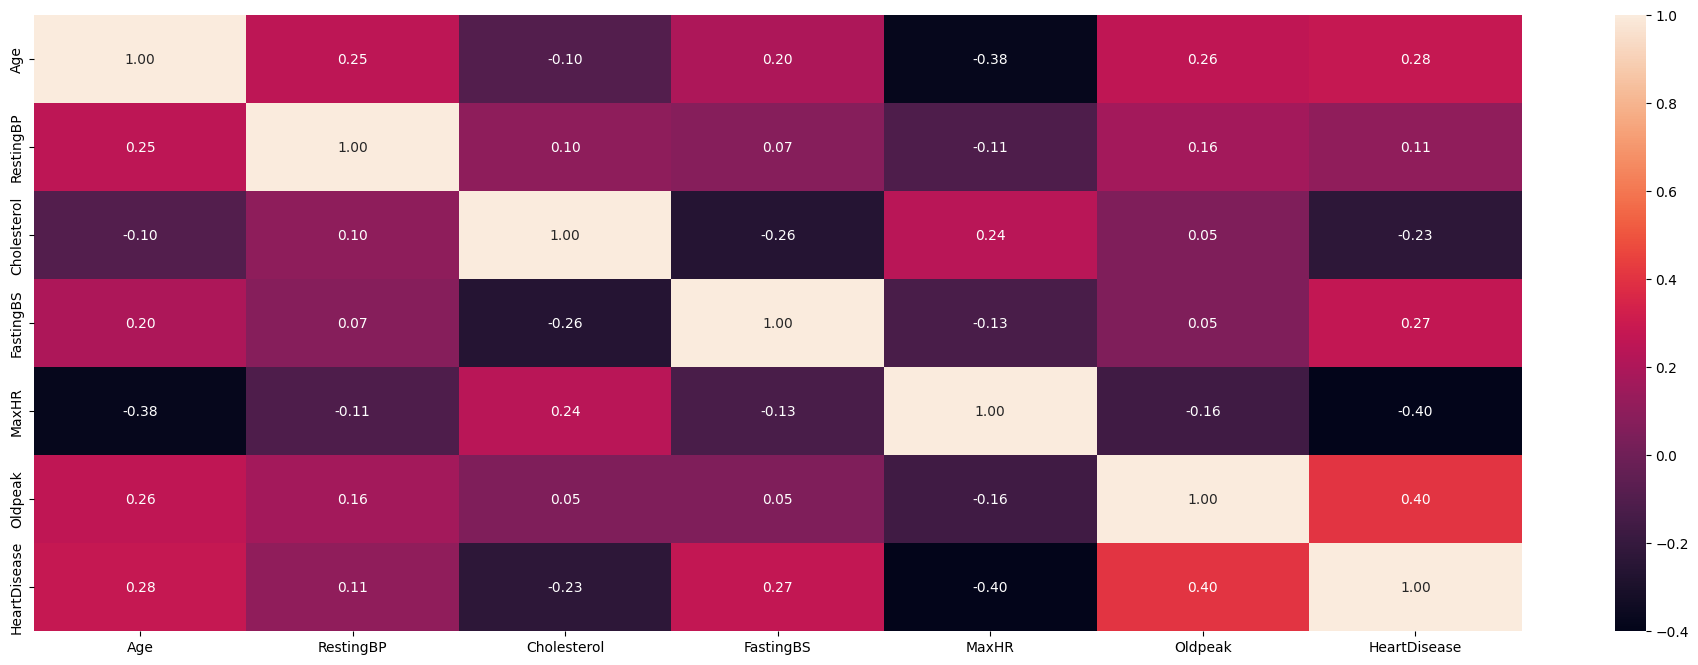

In [31]:
plt.figure(figsize=(24,8))
sns.heatmap(df[col_numerical].corr(),annot =True, fmt= ".2f");

This even makes it easier to see since one part of the diagonal is a mirror reflection of the other.

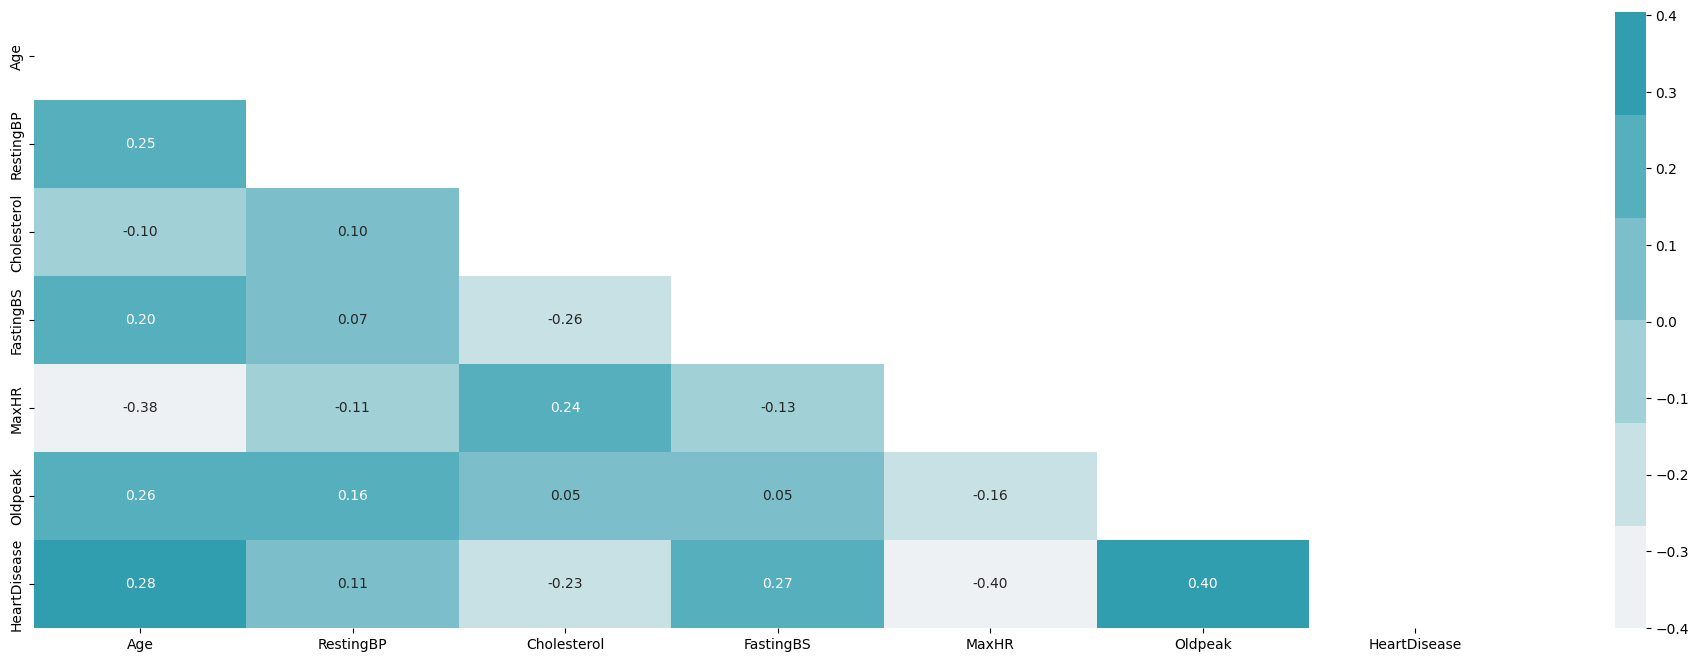

In [32]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(df[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(df[col_numerical].corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

In [33]:
#for label in df.iloc[:-1] :
#    plt.hist(df[df["HeartDisease"]==1][label], color ='red', label = ' Heart Failure', alpha=0.7, density= True)
 #   plt.hist(df[df["HeartDisease"]==0][label], color ='green',label = 'No heart failure', alpha=0.7, density= True)
 #   plt.title(label)
 #   plt.ylabel("Probability")
 #   plt.xlabel(label)
 #   plt.legend()
 #   plt.show()

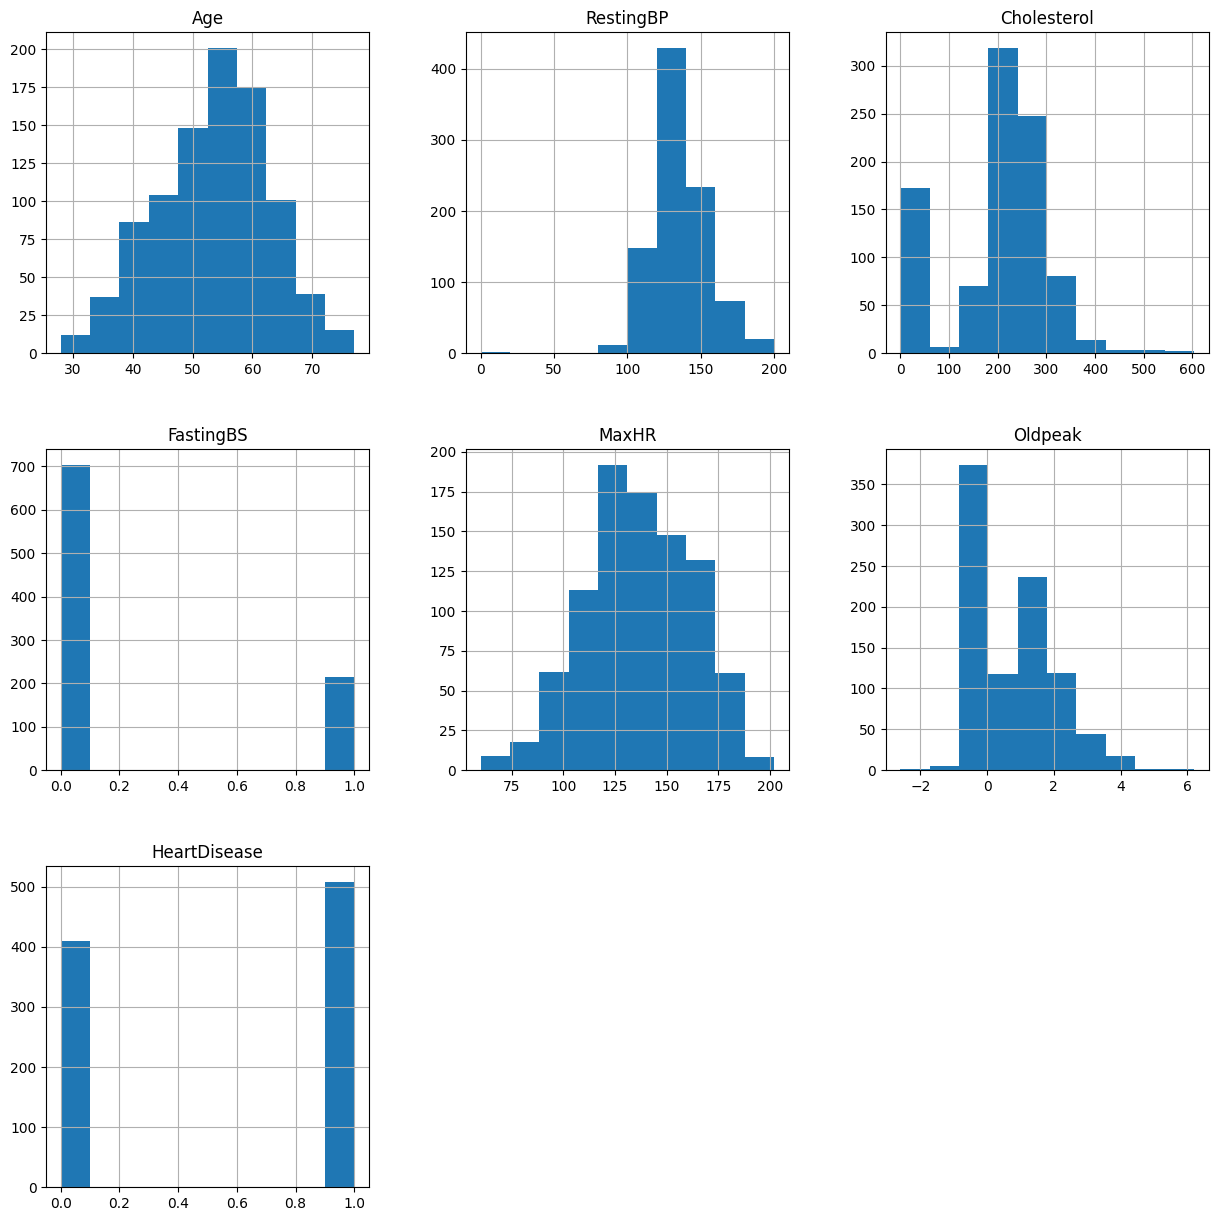

In [34]:
plt.rcParams['figure.figsize']=[15,15]

df.hist();

In [35]:
import plotly.express as px

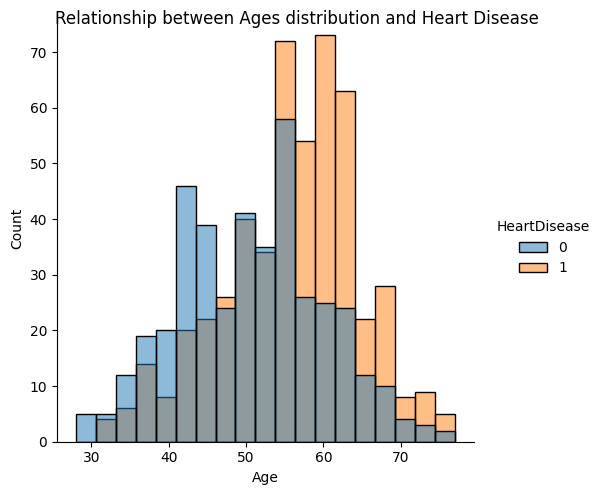

In [36]:
af = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = df

)
af.fig.suptitle('Relationship between Ages distribution and Heart Disease');

In [37]:
fig = px.box(df,
             x="HeartDisease",
             y="Age",
             color="HeartDisease",
             title="Heart diseas based on age(0 : No heart failure  and  1 : heart failure)",
             #color_discrete_map={'1':'red',
             #                    '0':'green'}
             )

fig.update_traces(quartilemethod="exclusive")
fig.show()

In [38]:
fig = px.box(df,
             x="HeartDisease",
             y="Cholesterol",
             color="HeartDisease",
             title="Cholesterol related to Heart Disease (0 : No heart failure  and  1 : heart failure)",
             #color_discrete_map={'1':'red',
             #                    '0':'green'}
             )

fig.update_traces(quartilemethod="exclusive")
fig.show()

The data shows that people of age above 50 suffres from heart failure more compared to ages below 50 years.

## Coverting the categorical data into numerical values(language understood by the  machine) for machine to understand and interpret.

We will do this using get_dummy function in pandas

In [39]:
data_cat = pd.get_dummies(df[col_categorical])
pd.set_option('display.max_columns',None)
data_cat.head()

,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1
3,0,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [40]:
x = pd.concat([df[col_numerical],data_cat],axis =1).drop(['HeartDisease'],axis=1)
pd.set_option('display.max_columns',None)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,1,0,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [41]:
y =df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [42]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   RestingECG_LVH     918 non-null    uint8  
 7   RestingECG_Normal  918 non-null    uint8  
 8   RestingECG_ST      918 non-null    uint8  
 9   Sex_F              918 non-null    uint8  
 10  Sex_M              918 non-null    uint8  
 11  ChestPainType_ASY  918 non-null    uint8  
 12  ChestPainType_ATA  918 non-null    uint8  
 13  ChestPainType_NAP  918 non-null    uint8  
 14  ChestPainType_TA   918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

### we are now  ready to train our model and start doing some predictins

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier() # this will use a defalut classifier size

tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
from sklearn.metrics import classification_report


y_pred = tree_model.predict(xtest)

In [46]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       140
           1       0.72      0.87      0.79       136

    accuracy                           0.77       276
   macro avg       0.78      0.77      0.77       276
weighted avg       0.78      0.77      0.77       276



In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain, tree_model.predict(xtrain))

array([[298,   0],
       [  0, 344]])

In [48]:
confusion_matrix(ytest, tree_model.predict(xtest))

array([[ 94,  18],
       [ 46, 118]])

Time to predict


In [49]:
input_data = (48,138,214,0,108,1.5,0,1,0,0,1,0,1,0,1,0,0,0,0,1)

input_data_np = np.asarray(input_data)

input_data_re = input_data_np.reshape(1,-1)

y_pred = tree_model.predict(input_data_re)
if(y_pred[0]==0):
  print('The heart has no sign of heart failure')

else:
  print('The patient has an heart failure')

The heart has no sign of heart failure


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

